In [2]:
import util
import exercise_0.task_1 as bikes

In [3]:
# Load the data and train a model
from sklearn.model_selection import train_test_split

data = bikes.load_data("../input/exercise_0/day")
data = bikes.transform_day_table(data)

train_set, _ = train_test_split(data, test_size=0.2, shuffle=False)

X_train, y_train = bikes.split_set(train_set)
# X_test, y_test = bikes.split_set(test_set)


# the shap_interaction_values need to match dimensionality with the training set
# so we only take the 4 most relevant features as described in the exercise
most_relevant_features = ["temp", "yr", "dteday", "hum"]
X_train = X_train[most_relevant_features]


In [4]:
import xgboost
# For some reason there is a bug if we want to calculate the shap_interaction_values 
# with the sklearn model, so we use a xgb RandomForrestRegressor instead
# 
model = xgboost.XGBRFRegressor().fit(X_train, y_train)

In [5]:
# Build the TreeExplainer and calculate the interaction values
import shap
explainer = shap.TreeExplainer(model)
shap_interaction = explainer.shap_interaction_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


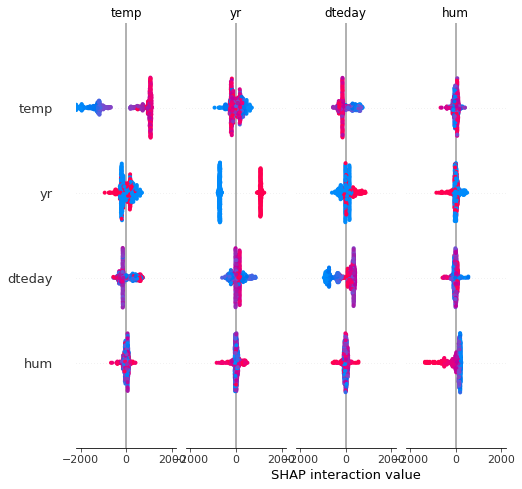

In [6]:
shap.summary_plot(shap_interaction, X_train, plot_size=(4, 4))

['temp', 'yr', 'dteday', 'hum']


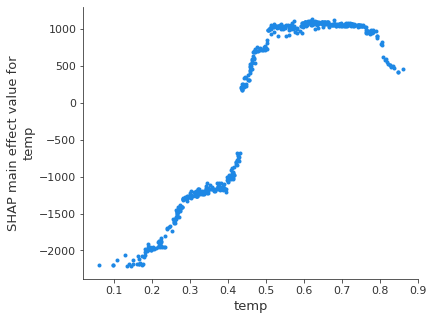

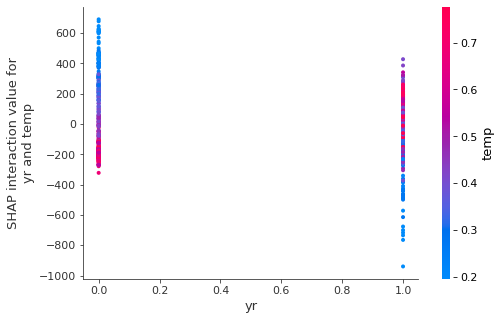

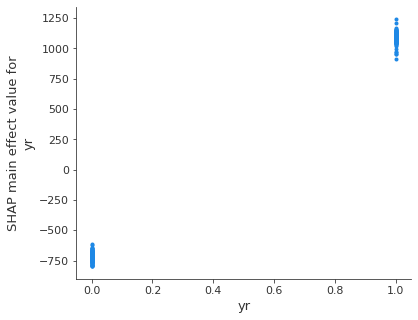

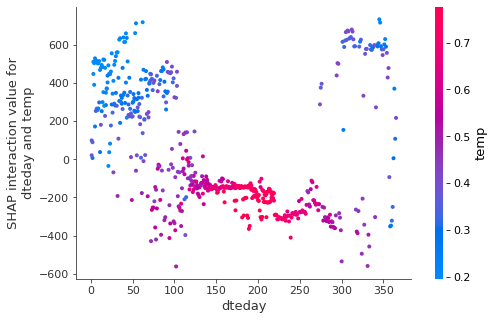

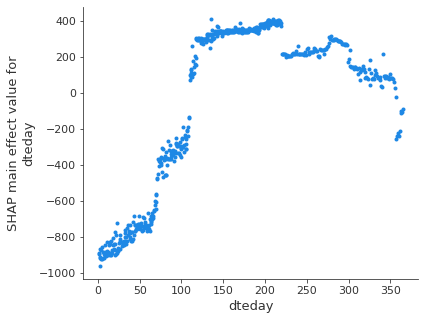

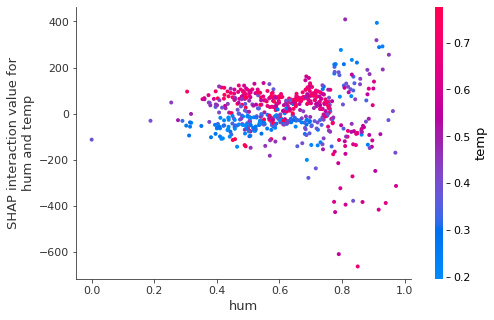

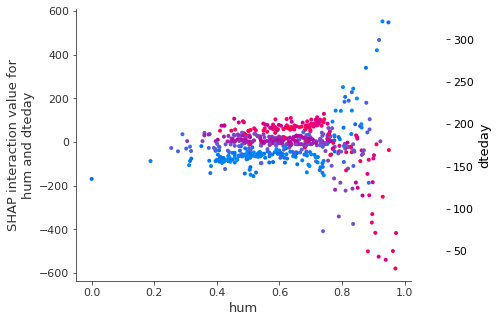

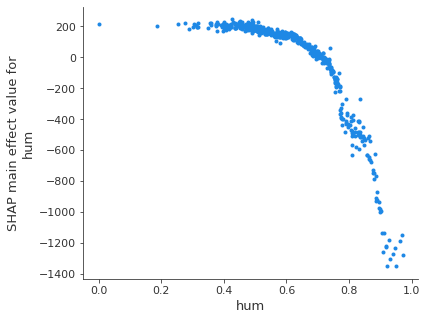

In [9]:
# Lets print out some of these interaction plots

shap.dependence_plot(
    ("temp", "temp"),
    shap_interaction, X_train
)

shap.dependence_plot(
    ("yr", "temp"),
    shap_interaction, X_train
)

shap.dependence_plot(
    ("yr", "yr"),
    shap_interaction, X_train
)

shap.dependence_plot(
    ("dteday", "temp"),
    shap_interaction, X_train
)

shap.dependence_plot(
    ("dteday", "dteday"),
    shap_interaction, X_train
)

shap.dependence_plot(
    ("hum", "temp"),
    shap_interaction, X_train
)

shap.dependence_plot(
    ("hum", "dteday"),
    shap_interaction, X_train
)

shap.dependence_plot(
    ("hum", "hum"),
    shap_interaction, X_train
)
